In [ ]:
import pandas as pd
columns = ['age', 'workclass', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
           'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


renamed_dataset = pd.read_csv("adult/adult.data",header= None, names = columns)

In [ ]:
renamed_dataset.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
renamed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The non-null count above is misleading as empty values are denoted using " ?" instead of an empty string. Below is a true overview of the amount of missing data.

In [ ]:
null_or_empty = renamed_dataset.isnull().sum() + (renamed_dataset == ' ?').sum() + (renamed_dataset == '').sum()
null_or_empty

age                  0
workclass         1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [ ]:
# Summary statistics for numerical features
print("\nNumerical Features Summary:\n", renamed_dataset.describe())

# Summary statistics for categorical features
print("\nCategorical Features Summary:\n", renamed_dataset.describe(include=['object']))



Numerical Features Summary:
                 age  final_weight  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Categorical Features Summary:
  

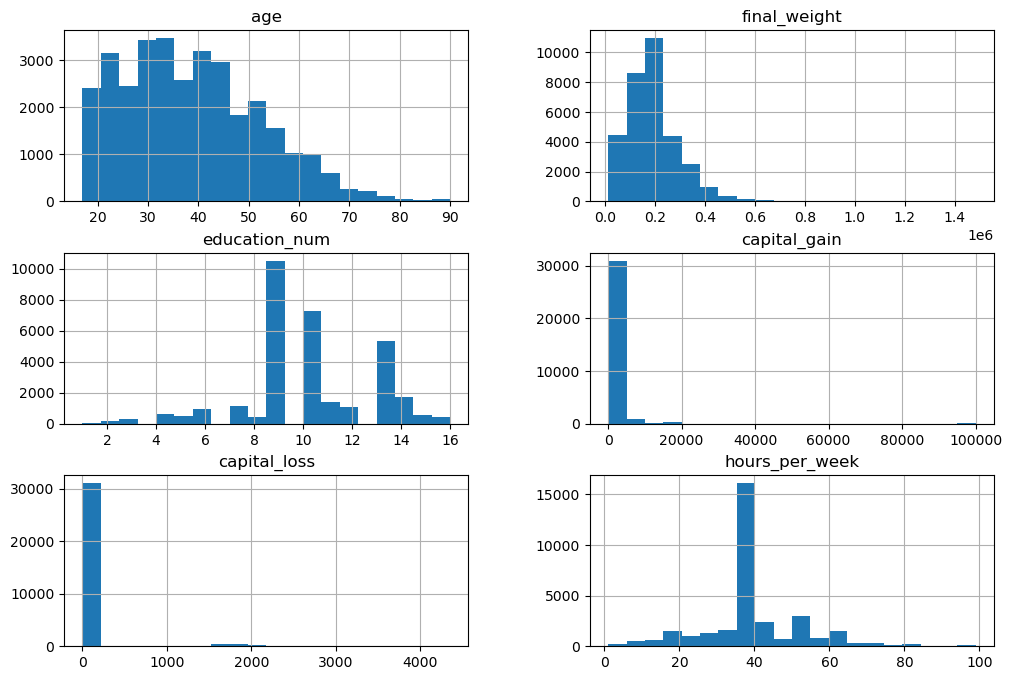

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for numerical features
renamed_dataset.hist(figsize=(12, 8), bins=20)
plt.show()


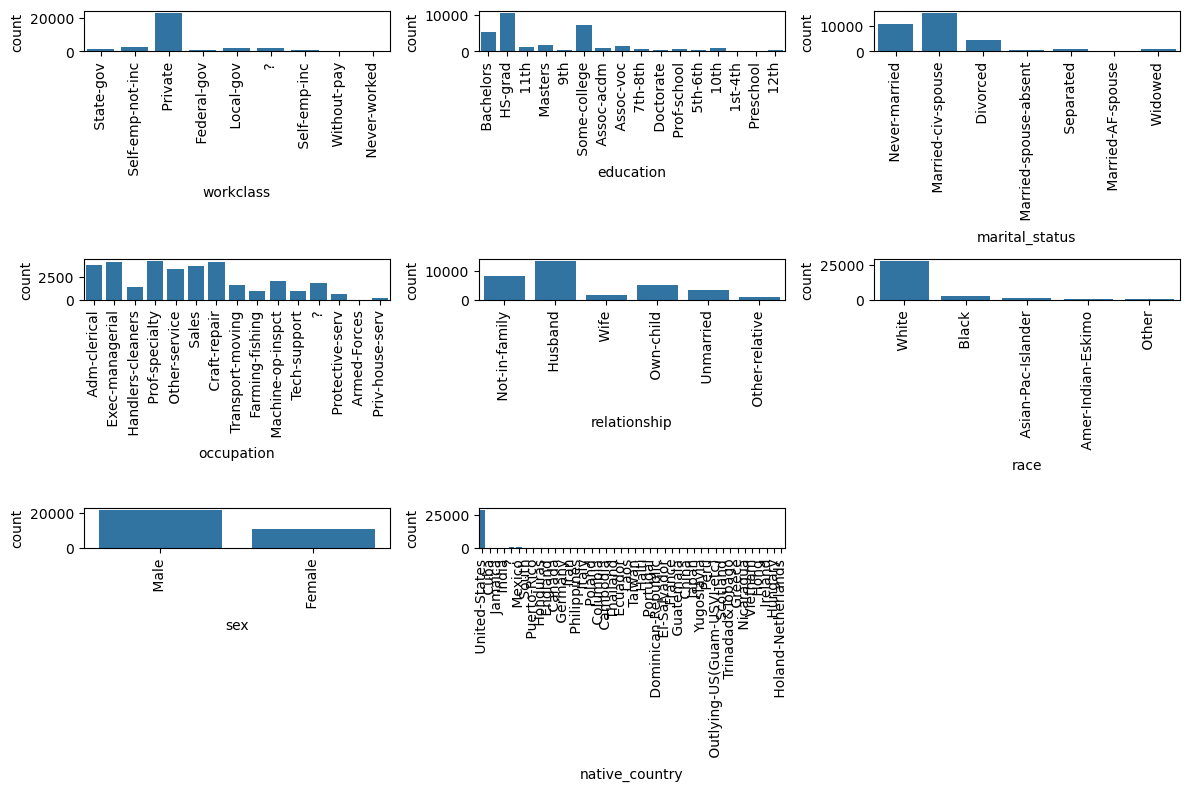

In [ ]:
import seaborn as sns

# Plot bar plots for categorical features
categorical_columns = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=renamed_dataset, x=column)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_columns = renamed_dataset.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = renamed_dataset.select_dtypes(include=['object']).columns

# Impute missing values in numerical columns with median
imputer_num = SimpleImputer(strategy='median')
renamed_dataset[numerical_columns] = imputer_num.fit_transform(renamed_dataset[numerical_columns])

# Impute missing values in categorical columns with most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
renamed_dataset[categorical_columns] = imputer_cat.fit_transform(renamed_dataset[categorical_columns])

# Check for remaining missing values
print("\nRemaining Missing Values After Imputation:\n", renamed_dataset.isnull().sum())



Remaining Missing Values After Imputation:
 age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical variables
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    renamed_dataset[column] = le.fit_transform(renamed_dataset[column])
    label_encoders[column] = le

# Take a look at the cleaned dataset
print("\nCleaned Dataset:\n", renamed_dataset.head())



Cleaned Dataset:
     age  workclass  final_weight  education  education_num  marital_status  \
0  39.0          7       77516.0          9           13.0               4   
1  50.0          6       83311.0          9           13.0               2   
2  38.0          4      215646.0         11            9.0               0   
3  53.0          4      234721.0          1            7.0               2   
4  28.0          4      338409.0          9           13.0               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             1     4    1        2174.0           0.0   
1           4             0     4    1           0.0           0.0   
2           6             1     4    1           0.0           0.0   
3           6             0     2    1           0.0           0.0   
4          10             5     2    0           0.0           0.0   

   hours_per_week  native_country  income  
0            40.0              39       0  
1  

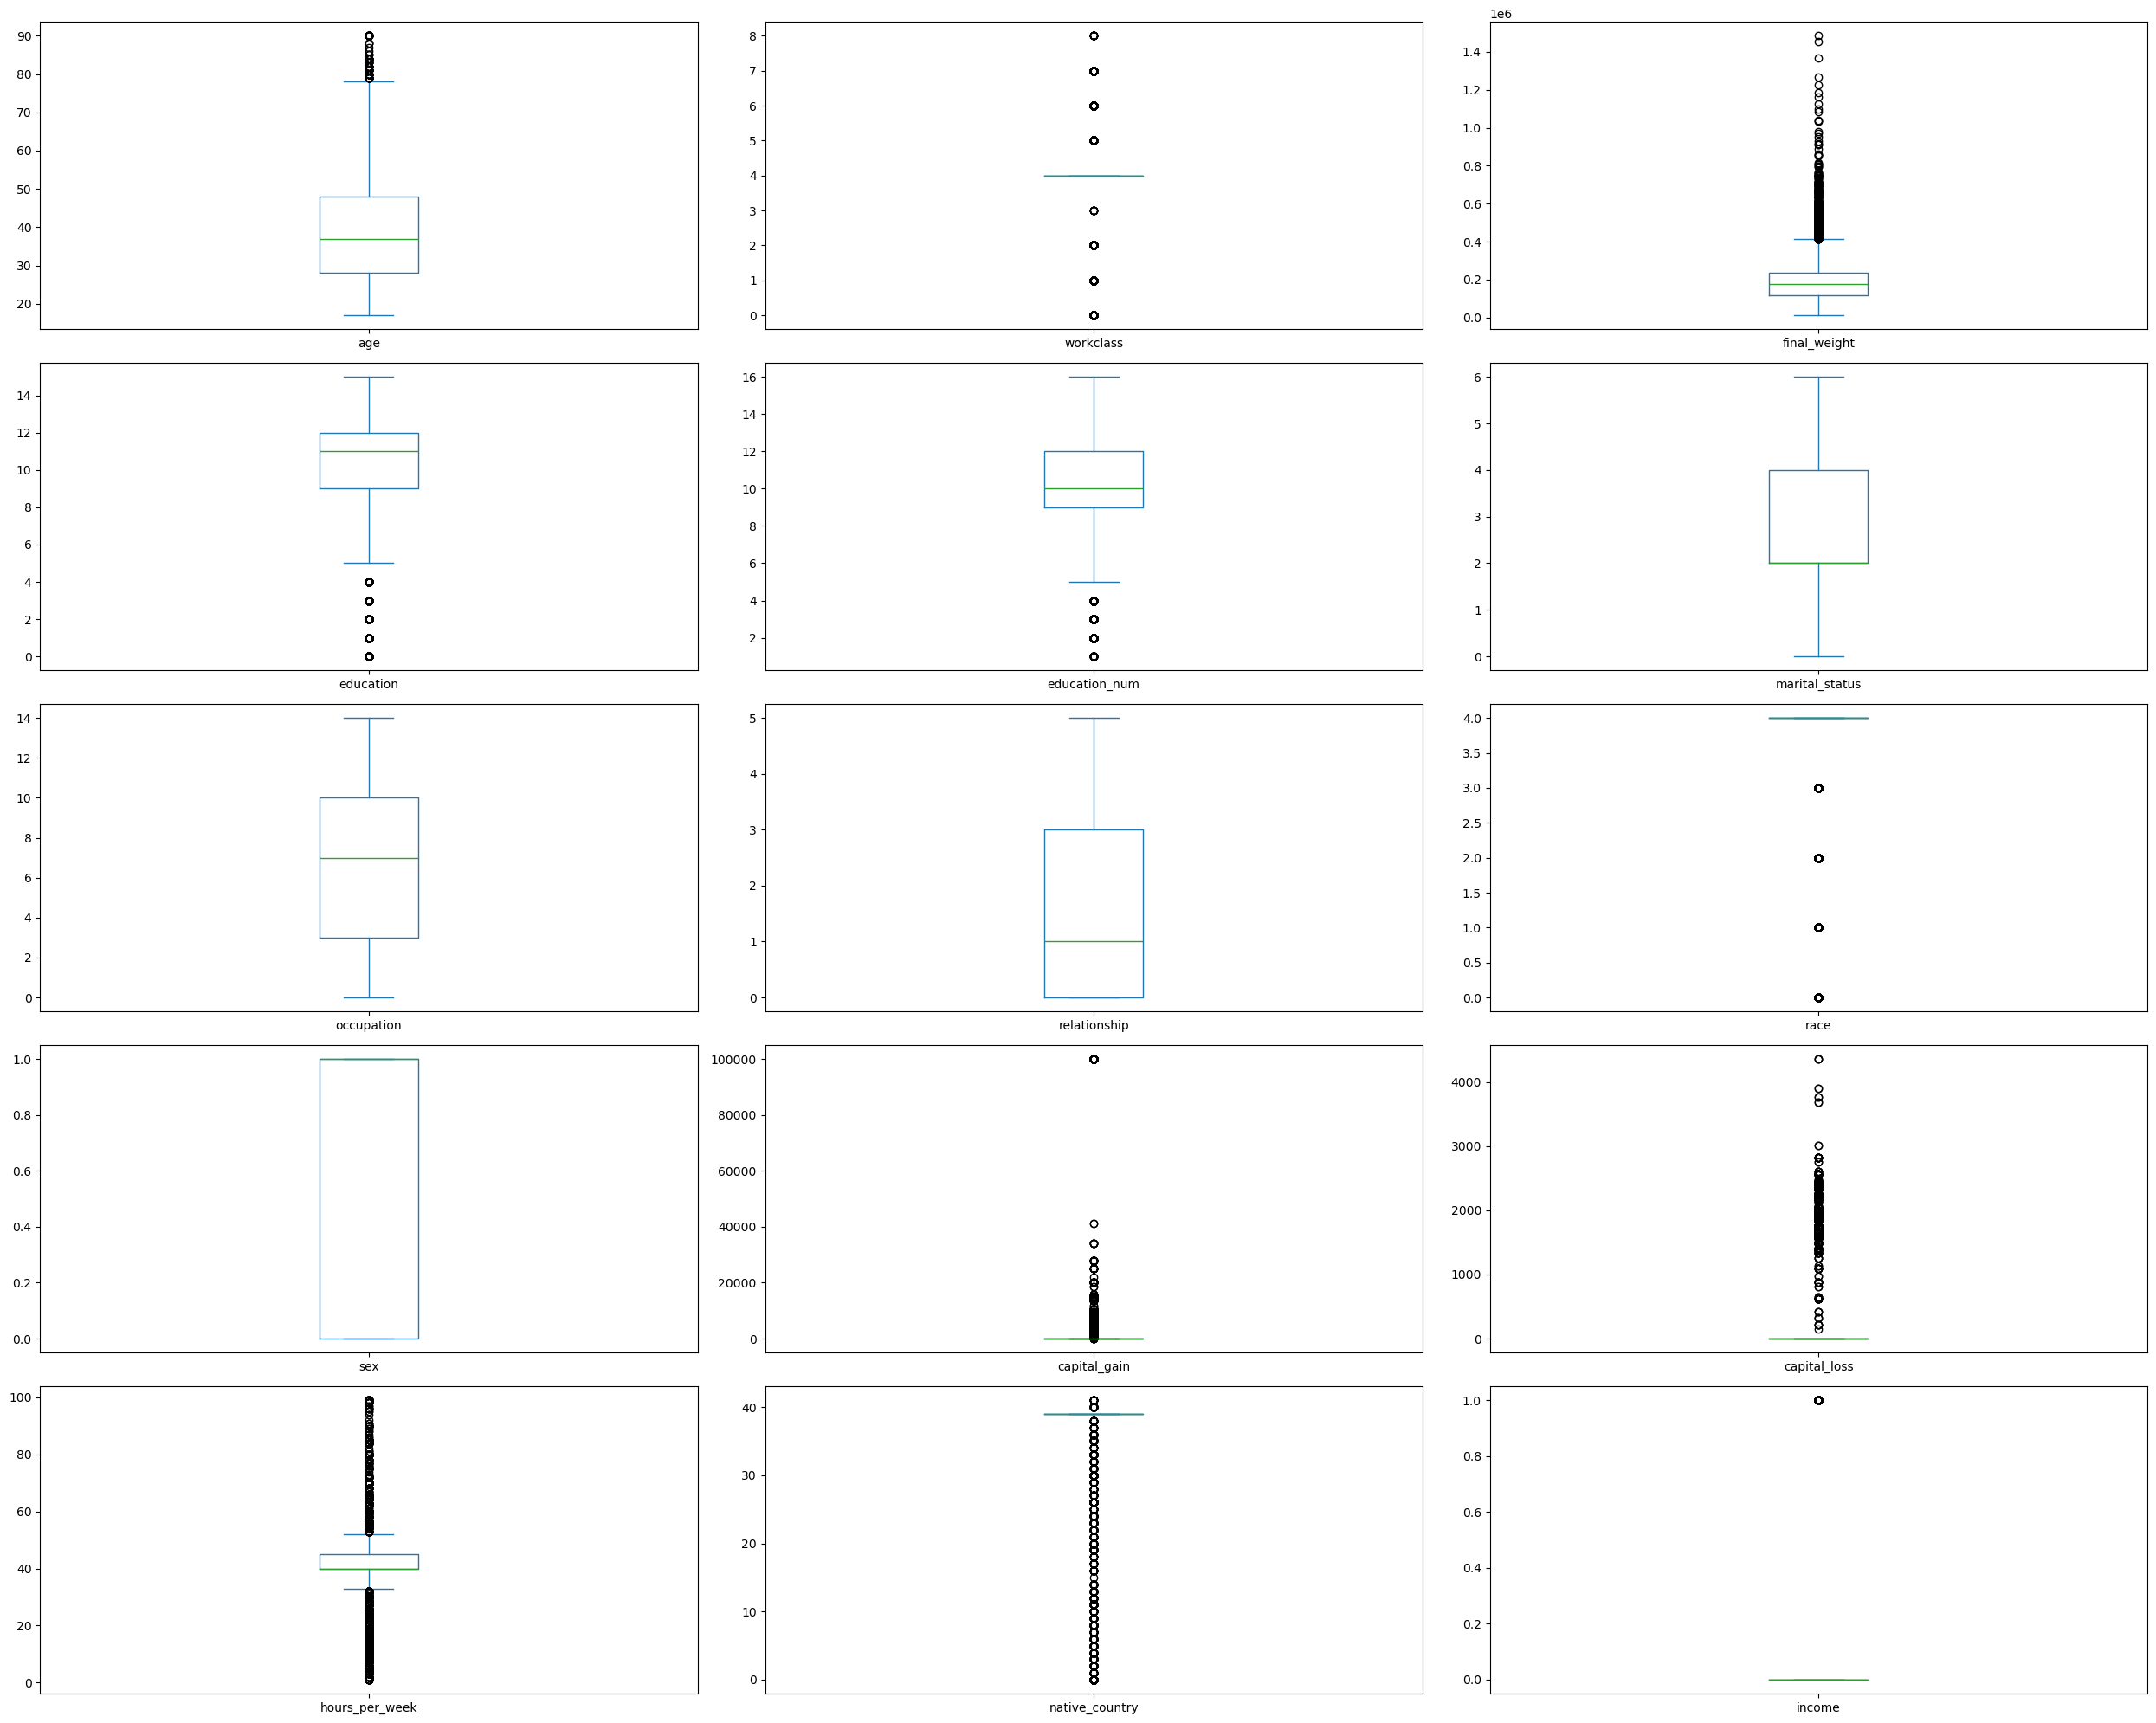

In [ ]:
numerical_columns = renamed_dataset.select_dtypes(include=['number']).columns
renamed_dataset[numerical_columns].plot(kind='box',subplots = True,layout = (5,3), figsize =(25,20))
plt.tight_layout()
plt.show()


/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


<Figure size 1200x800 with 0 Axes>

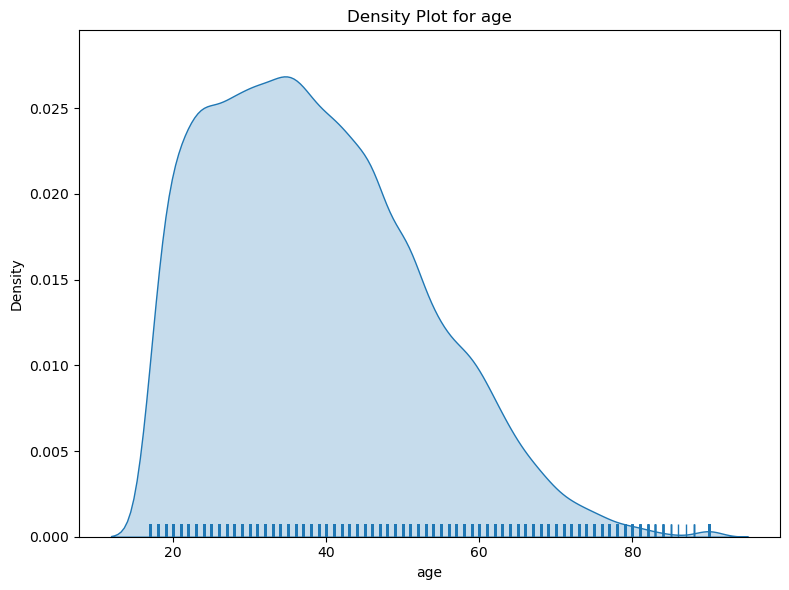

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


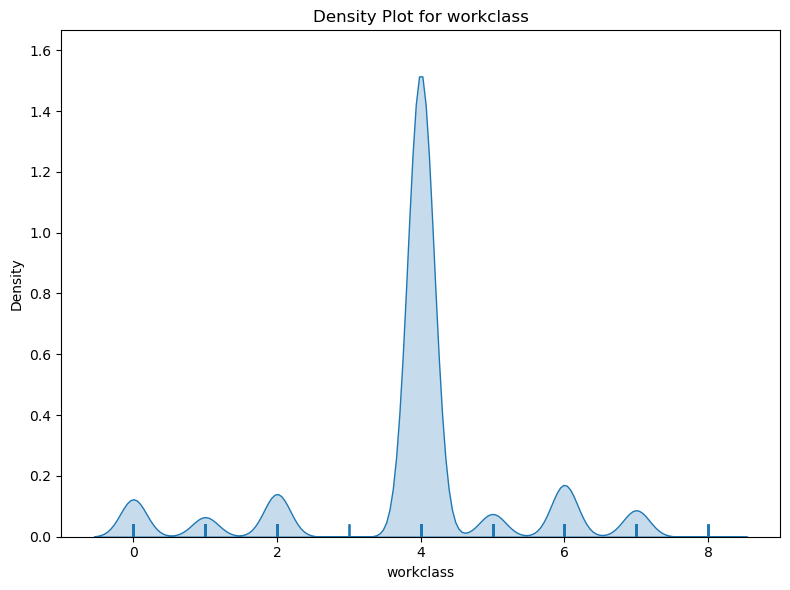

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


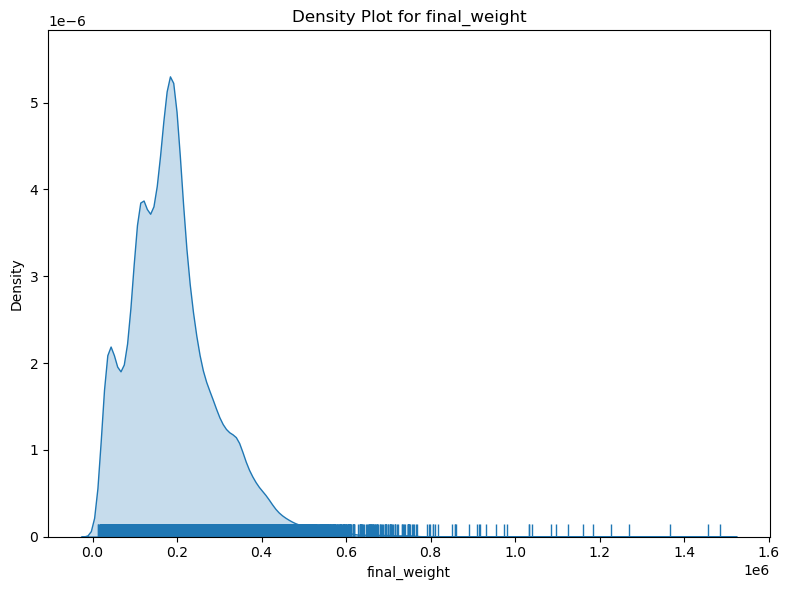

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


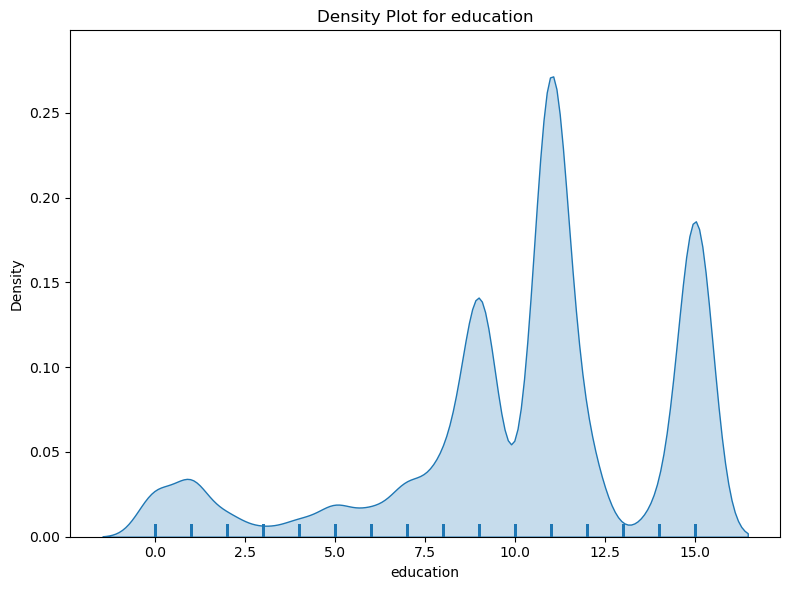

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


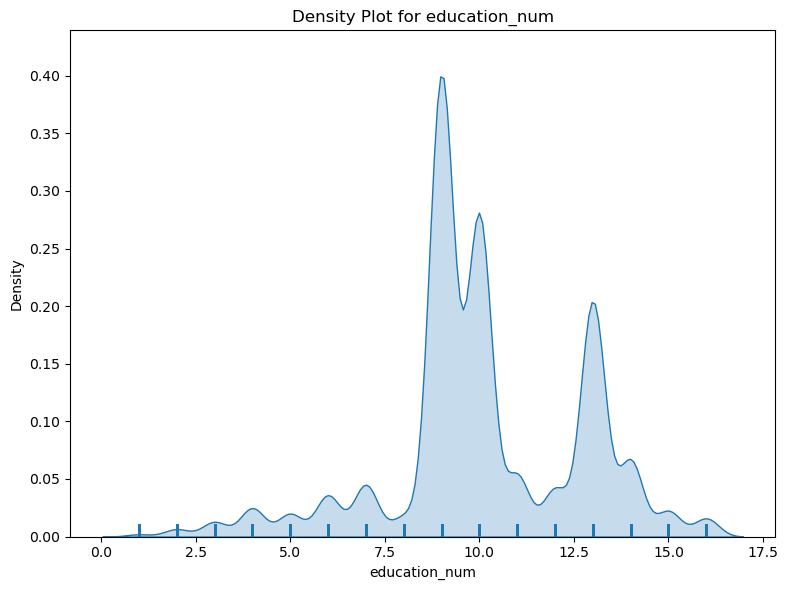

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


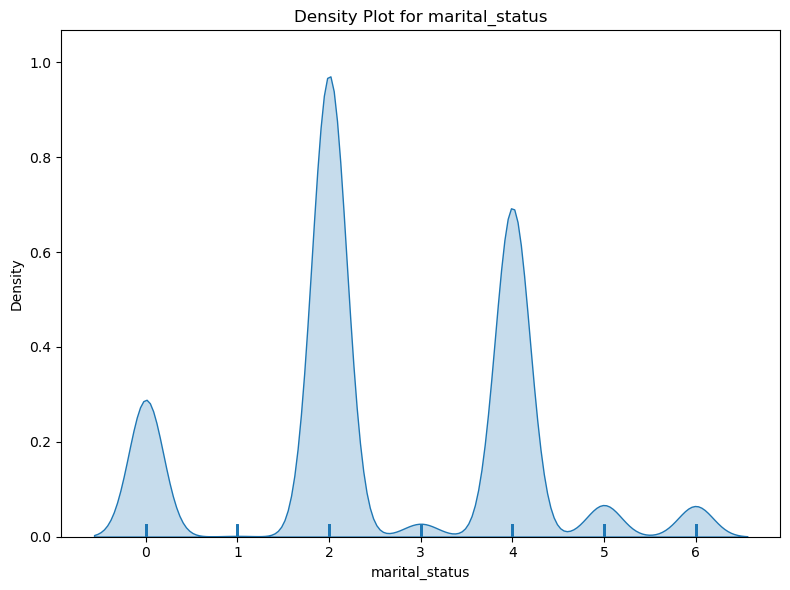

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


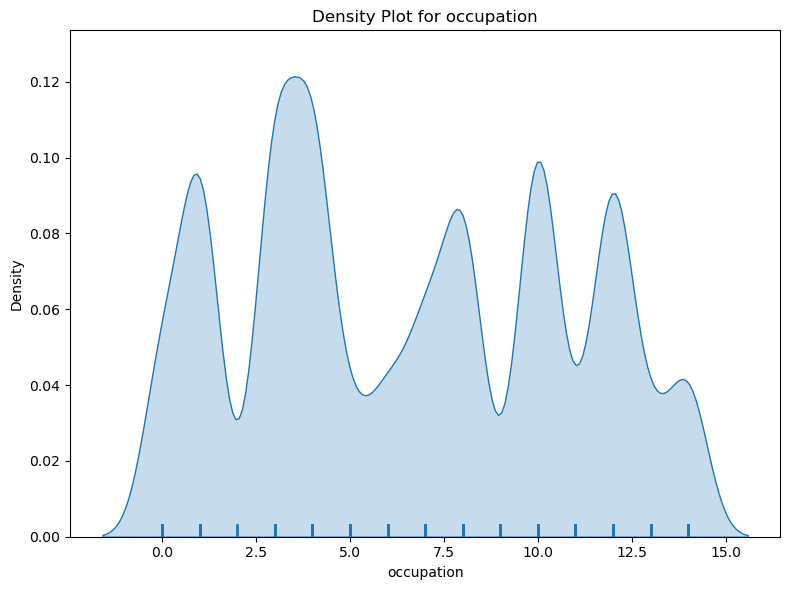

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


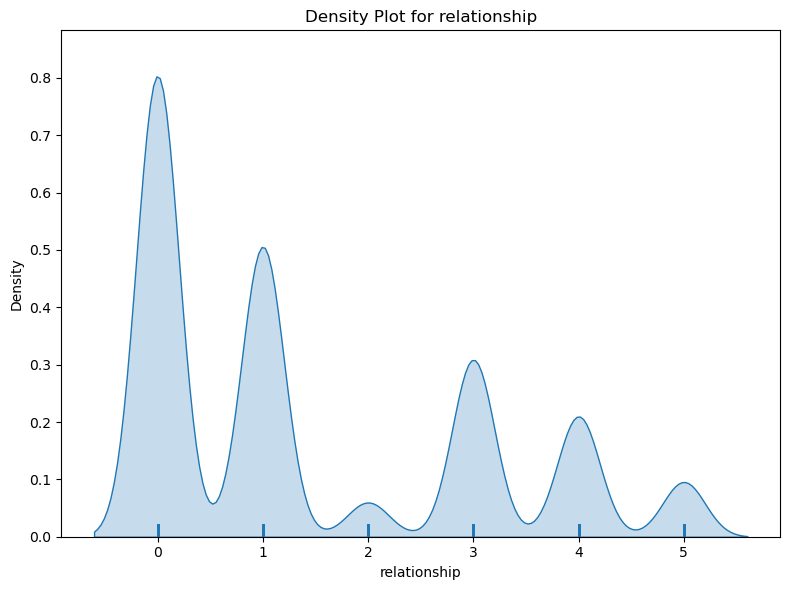

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


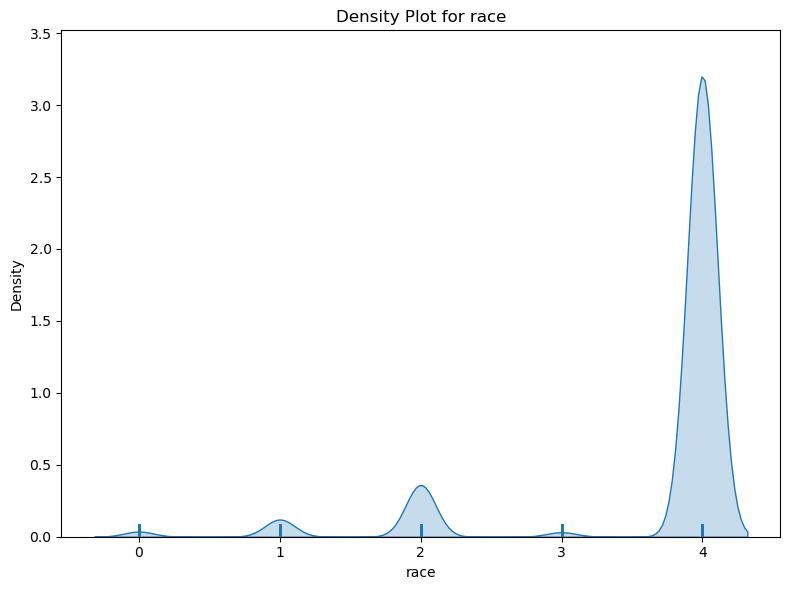

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


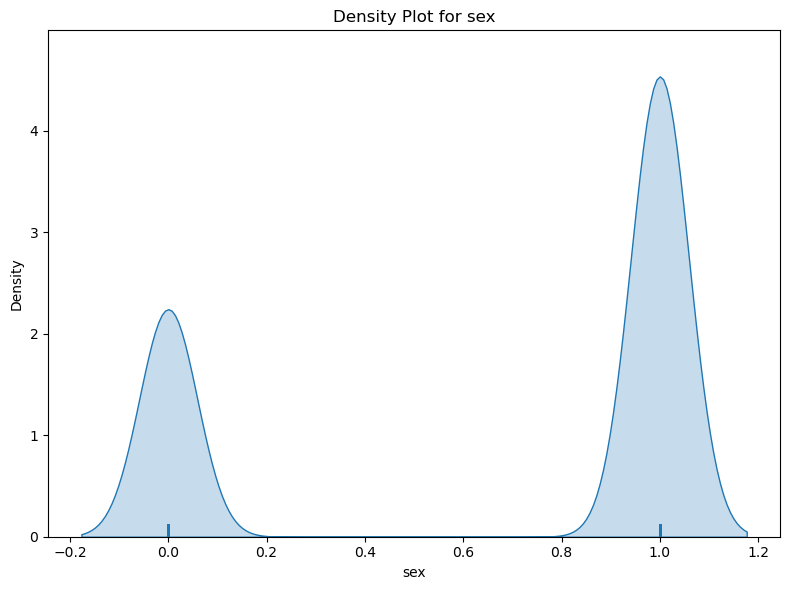

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


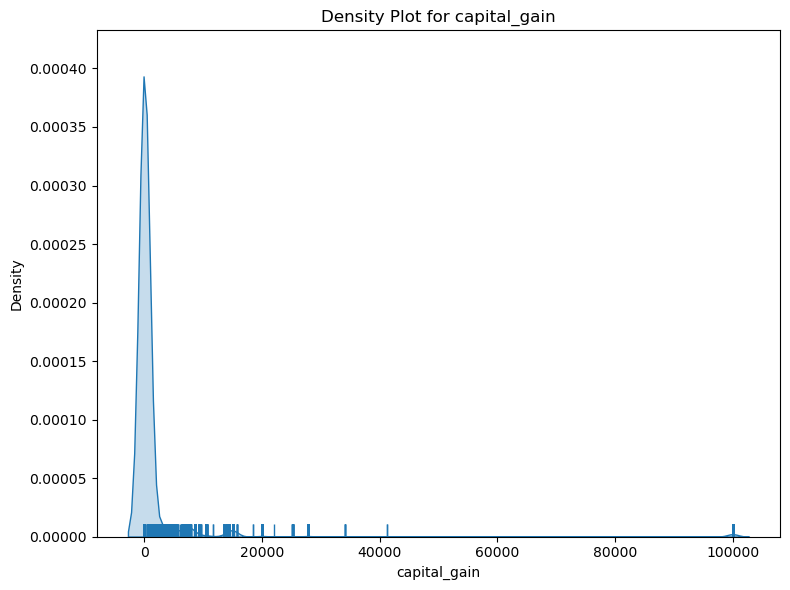

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


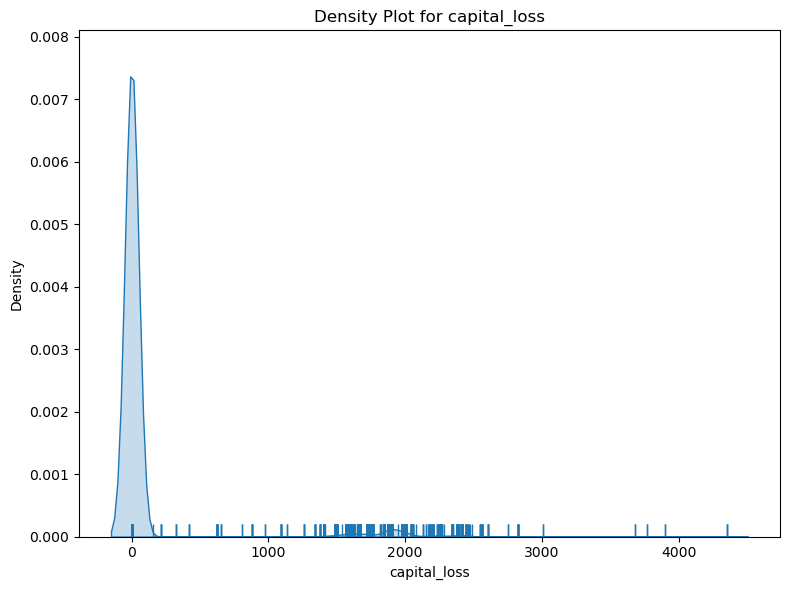

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


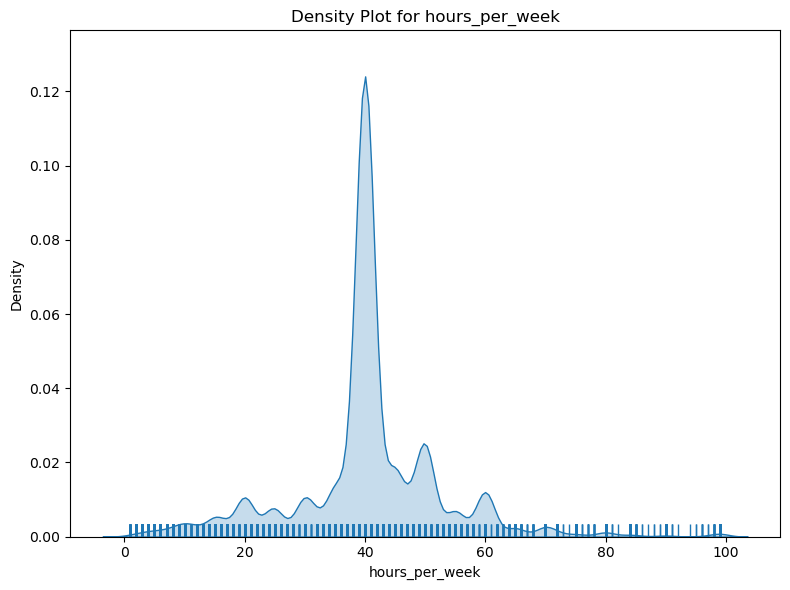

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


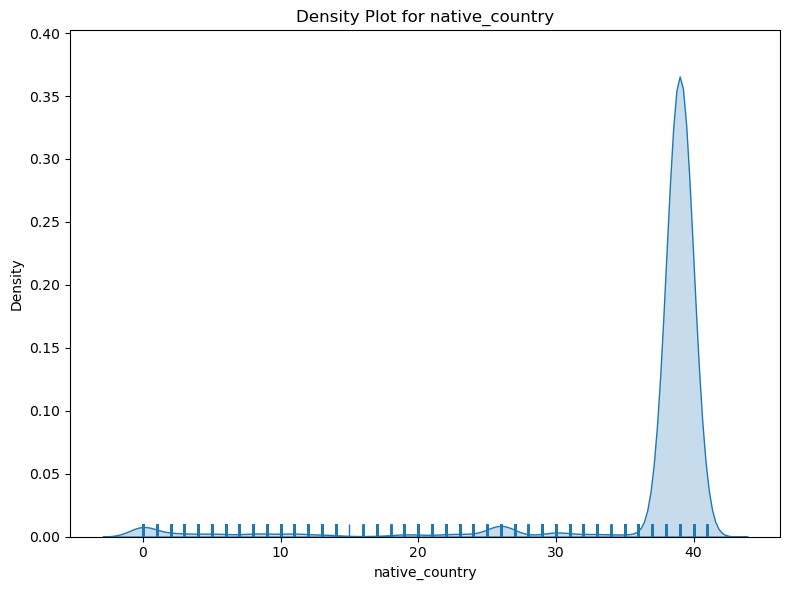

/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/1266868673.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(renamed_dataset[col], shade=True,fill=False)


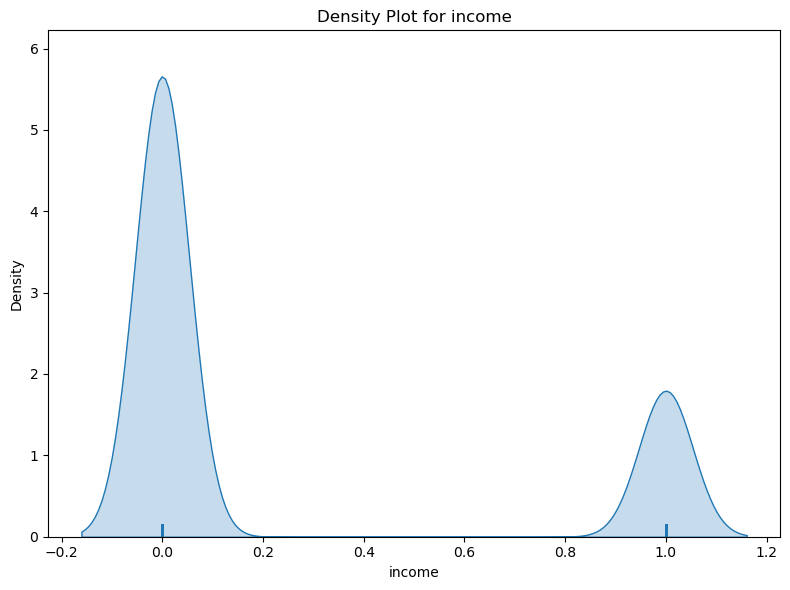

In [ ]:
plt.figure(figsize=(12, 8))
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(renamed_dataset[col], shade=True,fill=False)
    sns.rugplot(renamed_dataset[col])
    plt.title(f'Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

# Data cleaning


In [ ]:
#Removing the outliers
renamed_dataset = renamed_dataset[(renamed_dataset['capital_gain'] <= 50000) & (renamed_dataset['capital_loss'] <= 3100) & renamed_dataset['final_weight'] <= 1250000]

[link text](https://)Next, we encode the string valued features that only contain two unique values. The values are encoded as $-1$ and $1$ to maintain their semantics.

# Exploring the cleaned dataset

> Add blockquote


/var/folders/x5/144rptvs20127v2yjch46l3h0000gp/T/ipykernel_36280/3973330403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=renamed_dataset, palette='Set2')


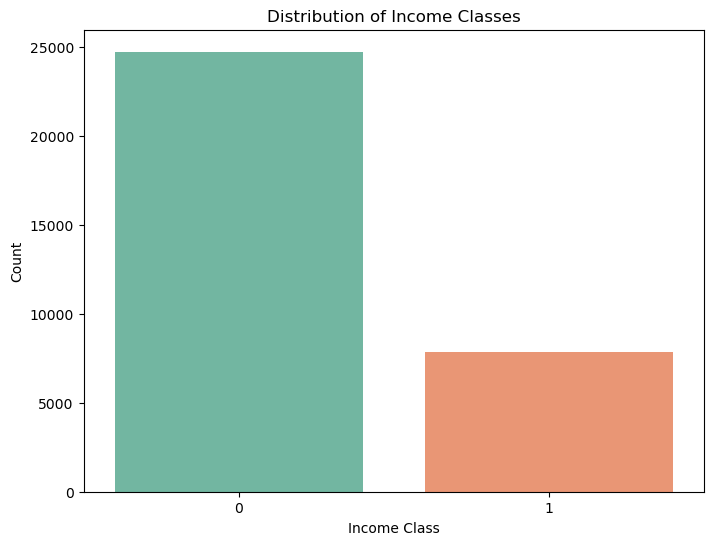

In [ ]:
#Distribution of income class
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=renamed_dataset, palette='Set2')
plt.title('Distribution of Income Classes')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

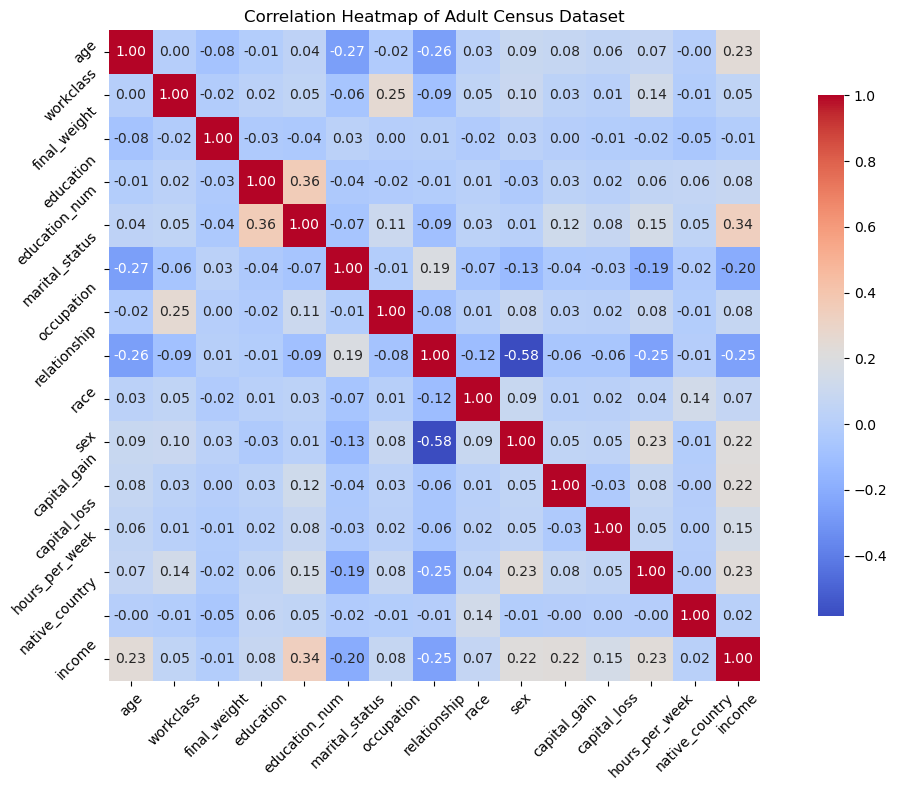

In [ ]:
# Calculate the correlation matrix
correlation_matrix = renamed_dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Title and labels
plt.title('Correlation Heatmap of Adult Census Dataset')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()


# Model training and evaluation

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Separate features and target variable
X = renamed_dataset.drop('income', axis=1)
y = renamed_dataset['income']
# Check the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (32561, 14)
Shape of y: (32561,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

Shape of X_train: (22792, 14), Shape of X_test: (9769, 14)
Shape of y_train: (22792,), Shape of y_test: (9769,)


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
logmodel = LogisticRegression(class_weight='balanced',max_iter=1000)

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
prediction = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,prediction))
accuracy_LR = accuracy_score(y_test, prediction)
print(f"Accuracy of Logistic Regression: {accuracy_LR:.2f}")


              precision    recall  f1-score   support

           0       0.91      0.77      0.84      7455
           1       0.51      0.76      0.61      2314

    accuracy                           0.77      9769
   macro avg       0.71      0.77      0.72      9769
weighted avg       0.82      0.77      0.78      9769

Accuracy of Logistic Regression: 0.77


In [ ]:
score1 = confusion_matrix(y_test, prediction)

print(score1)

[[5751 1704]
 [ 554 1760]]


### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = { 'penalty': ['l1', 'l2', 'elasticnet'],
              'C': [0.01, 0.1, 1, 10, 100],
              'solver': ['lbfgs', 'saga'],
              'max_iter': [100, 200, 500] }

log_grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=1)
log_grid.fit(X_train,y_train)

print('top performing parameters', log_grid.best_params_)
print('top Accuracy', log_grid.best_score_)
accuracy_LR_GSCV=log_grid.best_score_

# re-evaluting the model

best_log_mod = log_grid.best_estimator_
best_pred = best_log_mod.predict(X_test)
print(classification_report(y_test, best_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
top performing parameters {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
top Accuracy 0.8244997262261139
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7455
           1       0.71      0.45      0.55      2314

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769



/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
225 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1172, in fit
    solv

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score

criterion = "entropy"
splitter = "best"
max_depth = 10
tree = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)
tree.fit(X_train, y_train)
y_pred=tree.predict(X_test)
f1_score(y_test,y_pred)
# Evaluate the model
accuracy_DT = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Classifier: {accuracy_DT:.2f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy of Decision Classifier: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      7455
           1       0.77      0.54      0.63      2314

    accuracy                           0.85      9769
   macro avg       0.82      0.74      0.77      9769
weighted avg       0.85      0.85      0.84      9769



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'splitter': ["best", "random"],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 7, 11, 13]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 Score: {grid_search.best_score_}")
accuracy_DT_GSCV=grid_search.best_score_

# Use the best model
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)
print(f"Test F1 Score: {f1_score(y_test, y_pred)}")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Classifier: {accuracy:.2f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 13, 'splitter': 'best'}
Best F1 Score: 0.6707046120186472
Test F1 Score: 0.6789684304135171
Accuracy of Decision Classifier: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90      7455
           1       0.70      0.66      0.68      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.79      0.79      9769
weighted avg       0.85      0.85      0.85      9769



## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy_RF = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy_RF:.2f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of Random Forest: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7455
           1       0.74      0.62      0.68      2314

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.85      9769



##Using GridSearchCV with Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


# Initialize the Random Forest model
rf = RandomForestClassifier(class_weight='balanced')

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, None],     # Maximum depth of trees
    'min_samples_split': [2, 10, 20],# Minimum number of samples required to split a node
    'min_samples_leaf': [1, 4, 8],   # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'] # Function to measure the quality of a split
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

# Fit the model to the resampled training data
grid_search.fit(X_train, y_train)

# Output the best parameters and best F1 score from cross-validation
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best F1 Score (cross-validation): {grid_search.best_score_}")
accuracy_RF_GSCV=grid_search.best_score_

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Evaluate the tuned model on the test data

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest: {accuracy:.2f}")


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best F1 Score (cross-validation): 0.7079181254748872
Accuracy of Random Forest: 0.85


In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier(loss='log_loss', random_state=42)  # Use 'log' for logistic regression
sgd_model.fit(X_train, y_train)

# Make predictions
y_pred = sgd_model.predict(X_test)

# Evaluate the model
accuracy_SGD = accuracy_score(y_test, y_pred)
print(f"Accuracy of SGD Classifier: {accuracy_SGD:.2f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of SGD Classifier: 0.83

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.89      7455
           1       0.72      0.44      0.55      2314

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.82      0.83      0.81      9769



In [ ]:
from sklearn.model_selection import GridSearchCV
sgd_model = SGDClassifier(random_state=42)
param_grid = {
    'loss': ['log_loss', 'hinge', 'squared_hinge'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [5000, 8000, 10000],
    'tol': [1e-3, 1e-4, 1e-5]
}
grid_search = GridSearchCV(estimator=sgd_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Use 'log' for logistic regression
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")
accuracy_SGD_GSCV=grid_search.best_score_

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/line

Best parameters found: {'alpha': 0.001, 'loss': 'log_loss', 'max_iter': 5000, 'penalty': 'l2', 'tol': 0.0001}
Best cross-validation accuracy: 0.82
Test set accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7455
           1       0.70      0.46      0.55      2314

    accuracy                           0.82      9769
   macro avg       0.77      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769



In [ ]:
from sklearn.svm import SVC
# Initialize and train the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy_SVC = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM Classifier: {accuracy_SVC:.2f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy of SVM Classifier: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      7455
           1       0.80      0.32      0.46      2314

    accuracy                           0.82      9769
   macro avg       0.81      0.65      0.68      9769
weighted avg       0.82      0.82      0.79      9769



In [ ]:
##Grig search svm
from sklearn.model_selection import GridSearchCV
svm_model = SVC(random_state=42)
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale']  # Only for 'rbf' and 'poly' kernels
}

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")
accuracy_SVC_GSCV=grid_search.best_score_

# Use the best estimator to predict on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")

# Print the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation accuracy: 0.85
Test set accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      7455
           1       0.73      0.56      0.63      2314

    accuracy                           0.85      9769
   macro avg       0.80      0.75      0.77      9769
weighted avg       0.84      0.85      0.84      9769



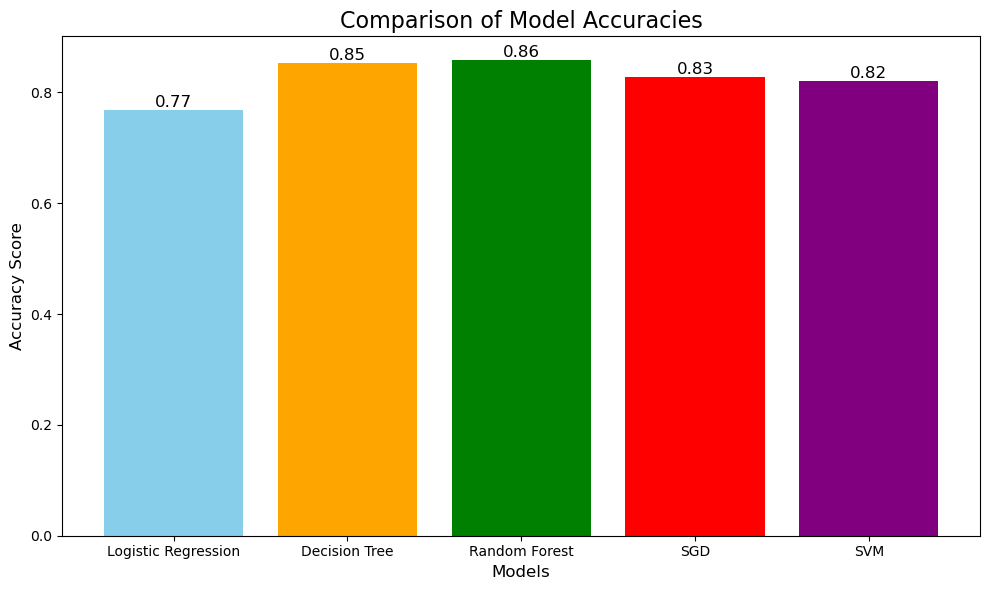

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each model (example data, replace with your actual accuracies)
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SGD', 'SVM']
accuracies = [accuracy_LR, accuracy_DT, accuracy_RF, accuracy_SGD, accuracy_SVC]  # Replace these with your actual accuracy scores

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

# Show the accuracy score on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


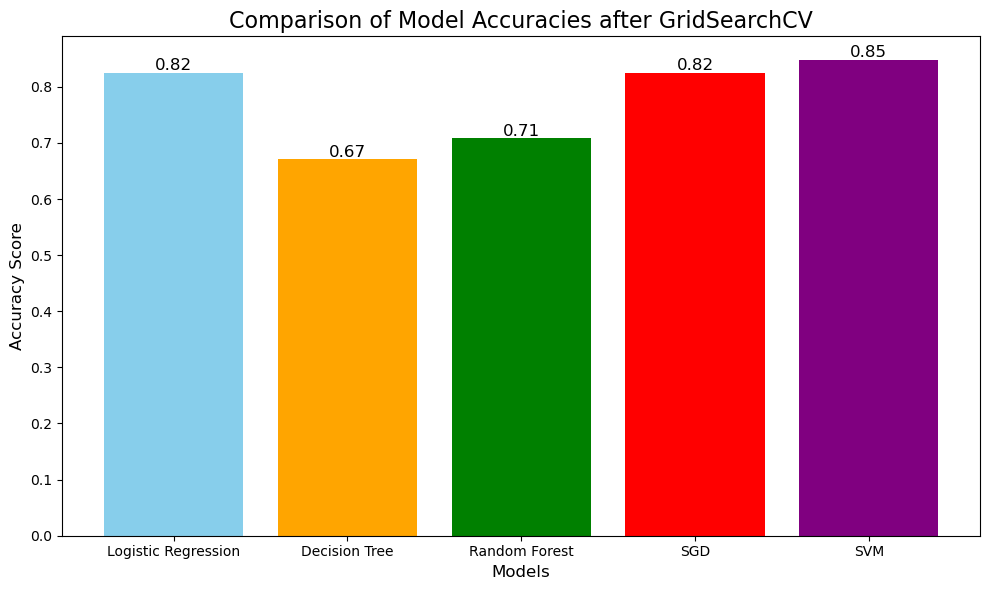

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores for each model after GridSearch(example data, replace with your actual accuracies)
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SGD', 'SVM']
accuracies = [accuracy_LR_GSCV, accuracy_DT_GSCV, accuracy_RF_GSCV, accuracy_SGD_GSCV, accuracy_SVC_GSCV]  # Replace these with your actual accuracy scores

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color=['skyblue', 'orange', 'green', 'red', 'purple'])

# Add title and labels
plt.title('Comparison of Model Accuracies after GridSearchCV', fontsize=16)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)

# Show the accuracy score on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()